# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
n = 100000 
fraud = pd.read_csv('C:/Users/ACER/Desktop/Data Analysis/Labs/lab-imbalance/your-code/Fraud.csv', nrows=n)

In [7]:
fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
fraud.shape

(100000, 11)

In [6]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [16]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

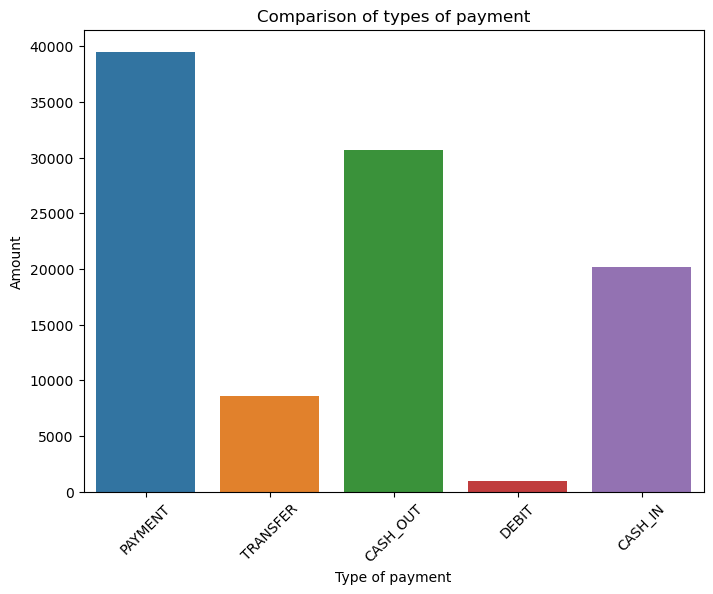

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=fraud, x='type')
plt.xlabel('Type of payment')
plt.ylabel('Amount')
plt.title('Comparison of types of payment')
plt.xticks(rotation=45)
plt.show()

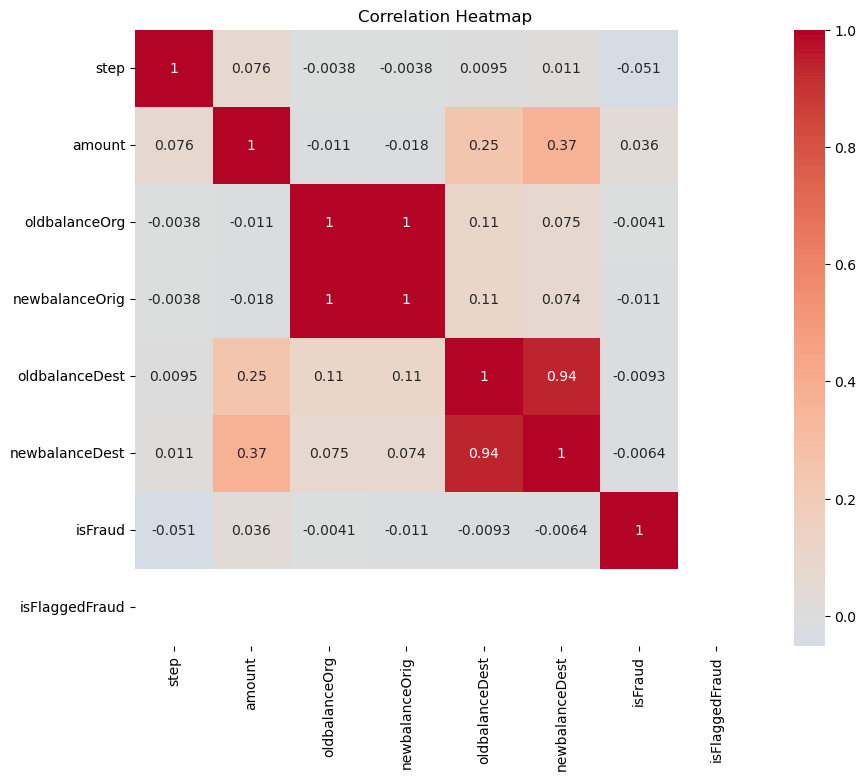

In [5]:
correlation_matrix = fraud.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### What is the distribution of the outcome? 

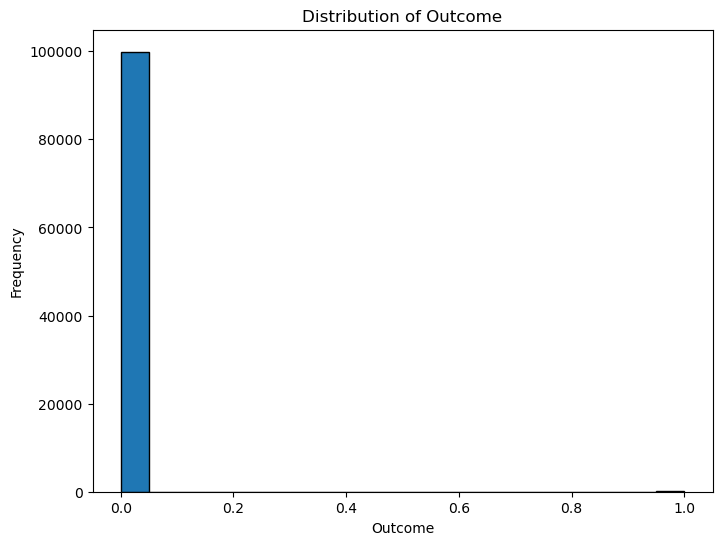

In [8]:
# Your response here
outcome = "isFraud"

plt.figure(figsize=(8, 6))
plt.hist(fraud[outcome], bins=20, edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Outcome')
plt.show()

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [9]:
# Your code here
fraud.drop(columns=['nameDest', 'nameOrig'], inplace=True)

In [10]:
dummies = pd.get_dummies(fraud['type'], prefix='type', drop_first=True)

fraud_dummified = pd.concat([fraud, dummies], axis=1)

fraud_dummified.drop('type', axis=1, inplace=True)

In [11]:
fraud_dummified

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,4020.66,159929.0,155908.34,0.00,0.00,0,0,0,0,1,0
99996,10,18345.49,6206.0,0.00,0.00,0.00,0,0,0,0,1,0
99997,10,183774.91,39173.0,222947.91,54925.05,0.00,0,0,0,0,0,0
99998,10,82237.17,6031.0,0.00,592635.66,799140.46,0,0,1,0,0,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [13]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = fraud_dummified.drop('isFraud', axis=1)
y = fraud_dummified['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9989


### Now pick a model of your choice and evaluate its accuracy.

In [19]:
# Your code here
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy


0.99965

### Which model worked better and how do you know?

In [2]:
# Your response here
#XGBoost model worked better as the accuracy score was 0.99965 for xgb and 0.9989 for logistic regression
#meaning that xgboost had 0.0007 higher accuracy, which is very little, but still better

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.